In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\EEG signal classification for psychological disorder using machine learning\EEG_data.csv")
data = pd.read_csv(r"C:\Users\ajayk\Desktop\EEG signal classification for psychological disorder using machine learning\demographic_info.csv")


In [3]:
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [4]:
df.shape


(12811, 18)

In [5]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [6]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

C:\Users\ajayk\AppData\Local\Temp\ipykernel_6068\2143383757.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'M':1,'F':0})
C:\Users\ajayk\AppData\Local\Temp\ipykernel_6068\2143383757.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})


In [7]:
df['predefinedlabel'].value_counts()

predefinedlabel
0.0    6662
1.0    6149
Name: count, dtype: int64

In [8]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

In [9]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.301538,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.641169,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,2.000000,1.000000


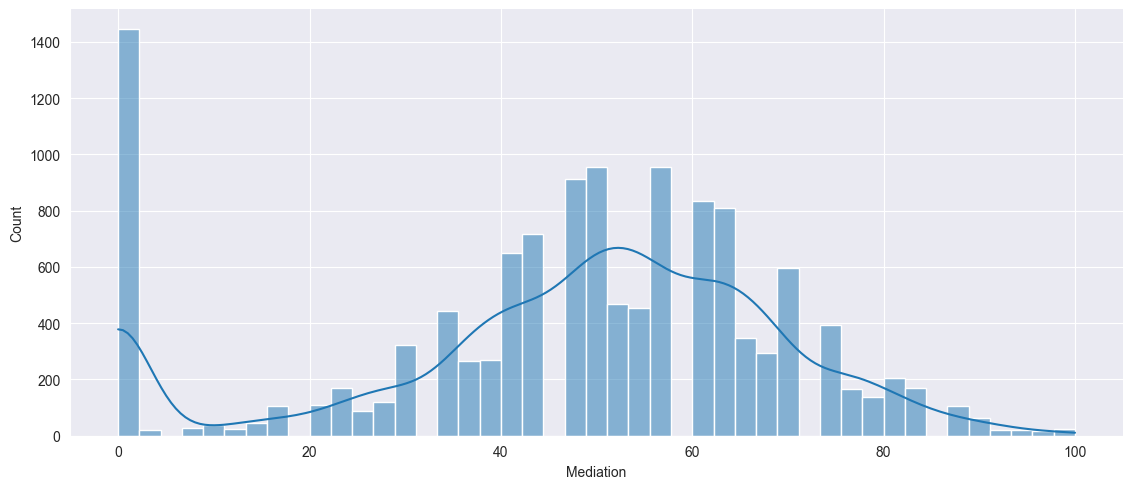

In [10]:
import seaborn as sns
import pandas as pd

# Assuming df is already defined
sns.set_style('darkgrid')
sns.displot(data=df, x='Mediation', kde=True, aspect=16/7)


<Axes: xlabel='Mediation', ylabel='Attention'>

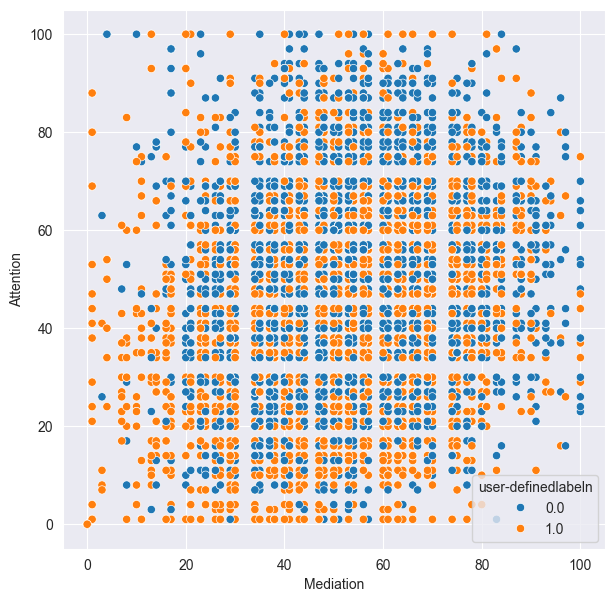

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=df, x='Mediation', y='Attention', hue='user-definedlabeln')


<Axes: xlabel='Mediation', ylabel='Raw'>

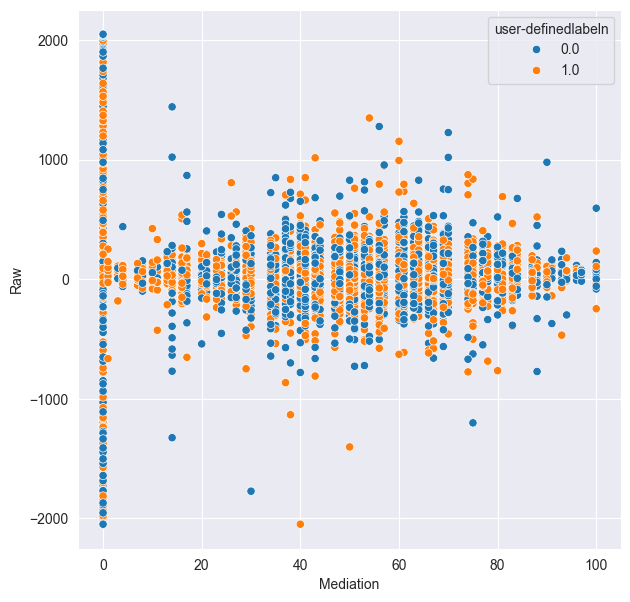

In [12]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Raw',hue='user-definedlabeln')

<Axes: xlabel='Mediation', ylabel='Theta'>

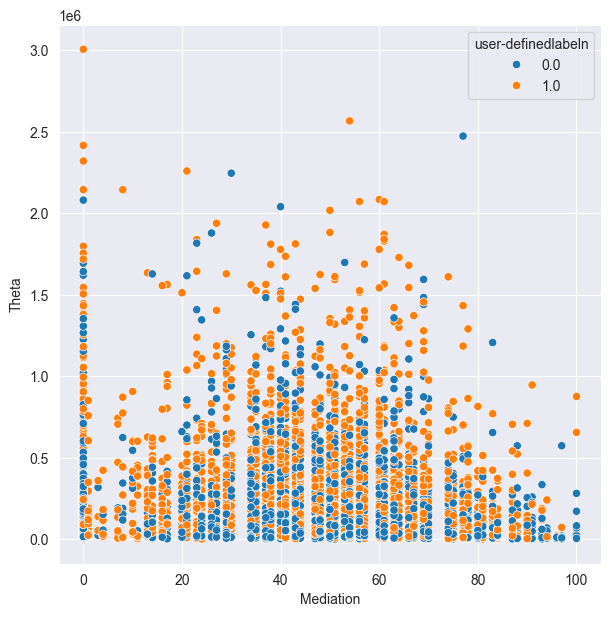

In [13]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Theta',hue='user-definedlabeln')

<Axes: xlabel='Mediation', ylabel='Alpha1'>

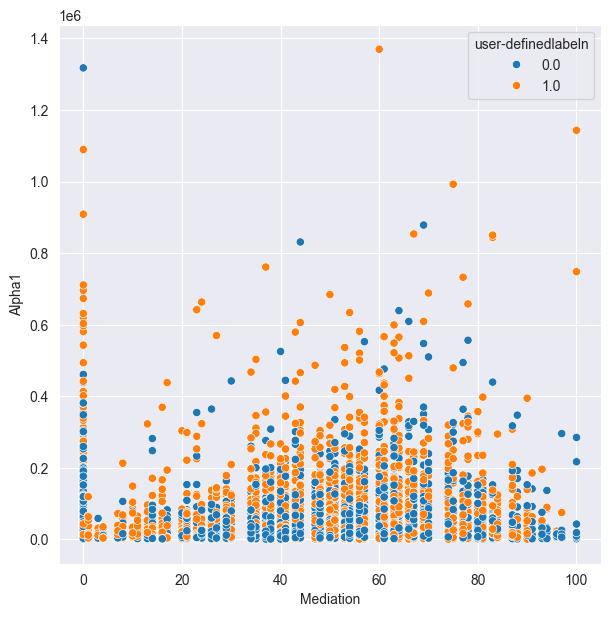

In [14]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Alpha1',hue='user-definedlabeln')

<Axes: xlabel='Mediation', ylabel='Gamma1'>

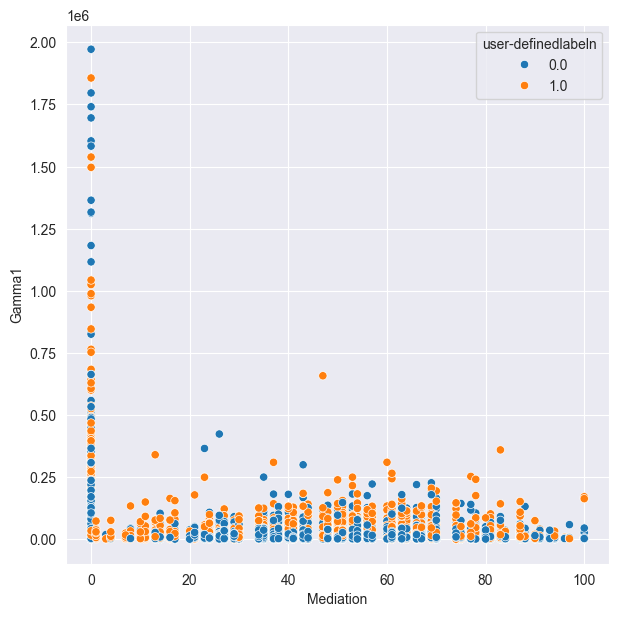

In [15]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Gamma1',hue='user-definedlabeln')

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [17]:
y=pd.get_dummies(df['user-definedlabeln'])
mi_score=mutual_info_classif(df.drop('user-definedlabeln',axis=1),df['user-definedlabeln'])
mi_score=pd.Series(mi_score,index=df.drop('user-definedlabeln',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

VideoID            6.286891
Attention          3.024098
Alpha2             2.598789
Gamma1             2.440946
Delta              2.426158
Theta              2.181961
Beta1              2.060570
Alpha1             2.018365
Gamma2             1.724772
Beta2              1.400094
SubjectID          1.388330
Mediation          1.334926
Raw                0.607719
age                0.389571
predefinedlabel    0.000000
ethnicity          0.000000
gender             0.000000
dtype: float64

In [18]:
mi_score.head(14).index

Index(['VideoID', 'Attention', 'Alpha2', 'Gamma1', 'Delta', 'Theta', 'Beta1',
       'Alpha1', 'Gamma2', 'Beta2', 'SubjectID', 'Mediation', 'Raw', 'age'],
      dtype='object')

In [19]:
top_fea=['VideoID', 'Attention', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1',
       'Alpha1', 'Mediation', 'Gamma2', 'SubjectID', 'Beta2', 'Raw', 'age']


In [20]:
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(df[top_fea])

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

In [22]:
from sklearn.model_selection import train_test_split
Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(Xtr,Ytr,random_state=108,test_size=0.27)

In [23]:
# Separate features and target variable, removing 'predefinedlabel', 'user-definedlabeln', 'ethnicity', and 'gender' columns
X = df.drop(columns=['predefinedlabel', 'user-definedlabeln'])
y = df['user-definedlabeln']


In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report

# # Assuming X contains your features and y contains your target variable

# # Data preprocessing
# # Handle missing values, encode categorical variables, scale features
# # For example, scaling features
# scaler = StandardScaler()
# X_scaled = df
# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Train SVM model
# svm_model = SVC(kernel='linear')  # You can also try other kernels like 'rbf'
# svm_model.fit(X_train, y_train)

# # Make predictions
# y_pred = svm_model.predict(X_test)

# # Evaluate model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming df contains your features and y contains your target variable
# Data preprocessing: Handle missing values, encode categorical variables, scale features
# For example, scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Scale your features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model with verbose output to see training progress
svm_model = SVC(kernel='linear', verbose=True)  # Verbose=True enables live progress logging
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[LibSVM]Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1298
         1.0       1.00      1.00      1.00      1265

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563

